# Assignment 2 - Customer Churn/Attrition

#### Enosh Nyarige - Machine Learning

In [84]:
import pandas as pd
pd.set_option("display.max_columns", 50)
import numpy as np
seed = 515
np.random.seed(seed)

In [85]:
df = pd.read_csv('churn.csv')
# dataset.isnull().sum()
# dataset.info()

#### The "TotalCharges" feature has 11 null values and is the only feature with null values. Dropping the rows with null values in the dataset will not affect the whole functionality

In [86]:
df.dropna(inplace = True)
# dataset.isnull().sum()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Drop the columns that will not help in making the prediction on the churn rate. In this case, the customerID feature.

In [87]:
df.drop(["customerID"],axis=1,inplace = True)

#### Encode the columns with text fields for data analysis
#### For the gender, its just male and female, hence two streams

In [88]:
df.gender = df.gender.map(dict(Male=1, Female=0))
display(df.gender.value_counts())

1    3549
0    3483
Name: gender, dtype: int64


#### Some features have more than 2 streams(3), and their conversion to integers can be combined

In [89]:
textColumns = [
    'Partner', 
    'Dependents', 
    'PhoneService', 
    'MultipleLines', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'PaperlessBilling', 
    'Churn']

for i in textColumns:
    df[i] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[i]]

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [90]:
# df = pd.get_dummies(data=df)
# df.head()

df = pd.get_dummies(df, columns = ['InternetService', 'Contract', 'PaymentMethod'], prefix = ['ISP', 'contract', 'payment'])
display(df.head(5))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,ISP_DSL,ISP_Fiber optic,ISP_No,contract_Month-to-month,contract_One year,contract_Two year,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [91]:
import os, logging, gc
from time import time
import time

pd.set_option("display.max_columns", 50)

import warnings

warnings.filterwarnings(action='ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams 

%matplotlib inline
rcParams['figure.figsize'] = 15, 8

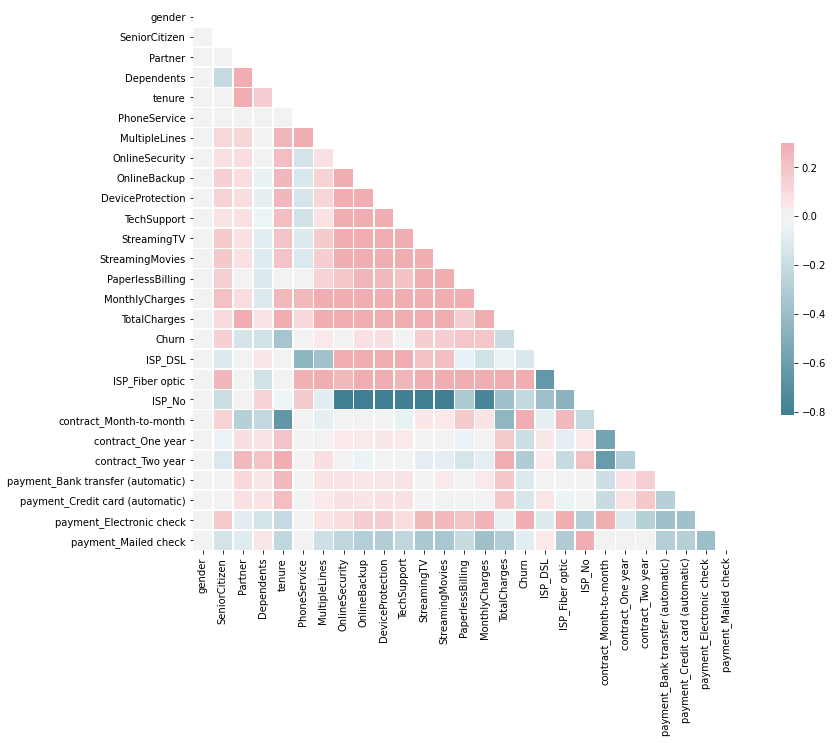

In [92]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})
plt.show();

## Training and Testing 

##### Before splitting, there are some columns that are not converted, fill with the default pandas dummies before training


In [93]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_recall_fscore_support
import pickle
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import make_scorer

In [94]:
X = df.drop('Churn', axis = 1, inplace = False)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)
print("Training target distribution:\n{}".format(y_train.value_counts()))
print("\nTesting target distribution:\n{}".format(y_test.value_counts()))


Training target distribution:
0    3610
1    1312
Name: Churn, dtype: int64

Testing target distribution:
0    1553
1     557
Name: Churn, dtype: int64


In [95]:
#assign Class_att column as y attribute
y = df.Churn.values

#drop Class_att column, remain only numerical columns
new_data = df.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =1)

In [97]:
def xgb_f1(y, t):
    #
    # Function to evaluate the prediction based on F1 score, this will be used as evaluation metric when training xgboost model
    # Args:
    #   y: label
    #   t: predicted
    #
    # Return:
    #   f1: F1 score of the actual and predicted
    #
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]   # change the prob to class output
    return 'f1', f1_score(t, y_bin)


def plot_evaluation_metric (y_true, y_prob):
    #
    # Function to plot the evaluation metric (cumulative gain, lift chart, precision and recall) on the screen
    # Args:
    #   y_true: array of y true label
    #   y_prob: array of y predicted probability (outcome of predict_proba() function)
    #
    # Return:
    #   None
    #
    skplt.metrics.plot_cumulative_gain(y_true, y_prob)
    plt.show();
    skplt.metrics.plot_precision_recall(y_true, y_prob)
    plt.show();
    skplt.metrics.plot_lift_curve(y_true, y_prob)
    plt.show();
    return 


def print_evaluation_metric (y_true, y_pred):
    #
    # Function to print out the model evaluation metrics
    # Args:
    #   y_true: array of y true label
    #   y_pred: array of y predicted class
    #
    # Return:
    #   None
    #
    precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred)
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("F-score: {}".format(fscore))
    print("Support: {}".format(support))
    return 


def get_confusion_matrix (y_true, y_pred, save=0, filename="this.csv"):
    #
    # Function to print out the confusion matrix on screen as well as print to csv file, if enabled
    # Args:
    #   y_true: array of y true label
    #   y_pred: array of y prediction
    #   save: to enable the write to csv file (default = 0)
    #   filename: the name of the file to be saved (default = this.csv)
    #
    # Return:
    #   None
    #
    from sklearn.metrics import confusion_matrix
    get_ipython().magic('matplotlib inline')
    cm = pd.DataFrame(confusion_matrix(y_true, y_pred),
                      columns = ['Predicted False', 'Predicted True'],
                      index = ['Actual False', 'Actual True']
                      )
    display(cm)
    if(save):
        cm.to_csv(filename, index = True)
    
    return 


def my_plot_roc_curve (y_true, y_prob, filename="img.png", dpi = 200):
    #
    # Function to plot the ROC curve by computing fpr and tpr as well as save the plot to file
    # Args:
    #   y_true: array of y true label
    #   y_prob: the output of y probability prediction (outcome for predict_proba() function)
    #   filename: the name of the file to be saved
    #   dpi: the resolution of the figure
    # Return:
    #   None
    #
    fpr, tpr, threshold = roc_curve(y_true, y_prob[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    fig.savefig(filename, dpi = dpi)
    return


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return



In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7032 non-null   int64  
 1   SeniorCitizen                      7032 non-null   int64  
 2   Partner                            7032 non-null   int64  
 3   Dependents                         7032 non-null   int64  
 4   tenure                             7032 non-null   int64  
 5   PhoneService                       7032 non-null   int64  
 6   MultipleLines                      7032 non-null   int64  
 7   OnlineSecurity                     7032 non-null   int64  
 8   OnlineBackup                       7032 non-null   int64  
 9   DeviceProtection                   7032 non-null   int64  
 10  TechSupport                        7032 non-null   int64  
 11  StreamingTV                        7032 non-null   int64

In [99]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,ISP_DSL,ISP_Fiber optic,ISP_No,contract_Month-to-month,contract_One year,contract_Two year,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,-1,1,0,0,0,0,0,1,29.60,346.45,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,1,0,1,0,0,0,0,0,1


In [103]:
knn = KNeighborsClassifier(n_neighbors = 4) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.7690120824449183


In [101]:
xgb.plot_importance(best_xgb, max_num_features = 15)
plt.show();

NameError: name 'best_xgb' is not defined